#[실습 1] 수업 태도에 따른 학업 성취 수준 분류하기
 흔히 학업 성적을 향상시키기 위해서는 수업에 열심히 참여해야 한다고 한다. 과연 수업에 적극적으로 참여하는지의 여부가 성적과 관련이 있을까? 성별, 수업 시간 내 발표를 위해 손을 드는 횟수, 수업 자료 조회 횟수, 공지 확인 횟수, 토의 참여 횟수, 결석 횟수 등의 속성을 통해 상위, 중위, 하위 성적으로 분류해 보자.

##[생각해 보기]

(1) 상위, 중위, 하위 성적군 결정에 영향을 미치는 요소에는 무엇이 있을까?
(2) 속성들을 통해 성적군을 분류해 보는 것이 기계학습으로 해결 가능한 문제인가? 그렇게 생각한 이유는 무엇인가?
(3) 상위, 중위, 하위 성적으로 분류하기 위해 어떤 학습 모델을 사용하면 좋을까?

##1단계. 주제 선택 및 문제 정의

##2단계. 데이터 수집 및 전처리

###1. 데이터 수집하기

###2.데이터 불러오기

 1. xAPI-Edu-Data.csv 파일을 불러와 코랩에 업로드하고 myfile에 저장한다.


In [1]:
from google.colab import files #코랩에 파일 업로드
myfile = files.upload()

Saving xAPI-Edu-Data.csv to xAPI-Edu-Data.csv


<실행 결과 해설>
코드를 실행하면 그림과 같이 '파일 선택' 버튼이 생성된다. 컴퓨터의 csv 파일을 선택해 업로드를 완료하면 '100% done'이라는 말과 함께 파일명이 뜬다.

2. 데이터 처리에 필요한 pandas 라이브러리를 pd라는 명칭으로 불러온다. 그리고 업로드한 데이터의 내용을 df라는 변수에 불러와 저장한다.

In [55]:
#데이터 처리를 위한 pandas 라이브러리를 불러오고 pd라는 별칭 지정하기
import pandas as pd
#csv파일의 데이터를 불러와 df라는 이름의 변수로 저장하기
df = pd.read_csv("xAPI-Edu-Data.csv")

3. df.head()를 이용해 df에 저장한 데이터 중 상위 5개 데이터를 화면에 ~~~~~~

In [4]:
#head() 함수를 이용해 데이터셋의 상위 5줄 확인하기
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


<실행 결과 해설> csv 파일이 어떤 형태로 ~~ 현재 본문 그대로 사용

###3. 결측치 확인 및 제거

1. len()은 데이터 개수~~~ 현재 본문 그대로 사용

In [5]:
#len 함수를 이용해 데이터셋이 총 몇 개의 행으로(데이터로) 이루어져 있는지 알아보기
len(df)

480

In [6]:
#info 함수를 이용해 데이터 속성의 자료형과 자료 개수 알아보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

2. isna().sum() ~ 본문 내용 그대로 사용

In [7]:
#isna().sum()함수를 이용해 속성별 결측치 갯수의 합 확인하기
df.isna().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

3. 문제 정의 단계에서 선정한 핵심 속성인 손을 든 횟수(raisedhands), 자료 접근 횟수(VisITedResources), 결석 횟수(StudentAbsenceDays), 성적 등급(Class)만 포함하는 데이터프레임을 df1이라는 변수명으로 저장한다.

In [38]:
#특정 속성들의 데이터들만 뽑아 df1이라는 이름의 데이터프레임 구성하기
df1 = df[['raisedhands','VisITedResources', 'StudentAbsenceDays', 'Class']]

In [39]:
#head()함수를 이용해 df1의 상위 5개 데이터 확인하기
df1.head()

,raisedhands,VisITedResources,StudentAbsenceDays,Class
0,15,16,Under-7,M
1,20,20,Under-7,M
2,10,7,Above-7,L
3,30,25,Above-7,L
4,40,50,Above-7,M


4. 학습에 적합한 데이터 형태로 바꾸기 위해 모든 속성의 값을 수치형 데이터로 바꾼다. 그리고 head() 함수를 이용해 상위 5개 데이터를 확인해 자료형이 잘 바뀌었는지 점검한다.

In [54]:
#기계학습에 활용하기 위해 replace()를 이용해 문자형 데이터를 수치형 데이터로 변환하기
df1['StudentAbsenceDays'] = df1['StudentAbsenceDays'].replace({'Under-7':0, 'Above-7':1})
df1['Class'] = df1['Class'].replace({'L':0, 'M':1, 'H':2})

<ipython-input-54-cc5ebf7041b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['StudentAbsenceDays'] = df1['StudentAbsenceDays'].replace({'Under-7':0, 'Above-7':1})
<ipython-input-54-cc5ebf7041b5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Class'] = df1['Class'].replace({'L':0, 'M':1, 'H':2})


In [41]:
df1.head()

,raisedhands,VisITedResources,StudentAbsenceDays,Class
0,15,16,0,1
1,20,20,0,1
2,10,7,1,0
3,30,25,1,0
4,40,50,1,1


#(지도서에 넣을 내용)

<히트맵 핵심속성 확인>

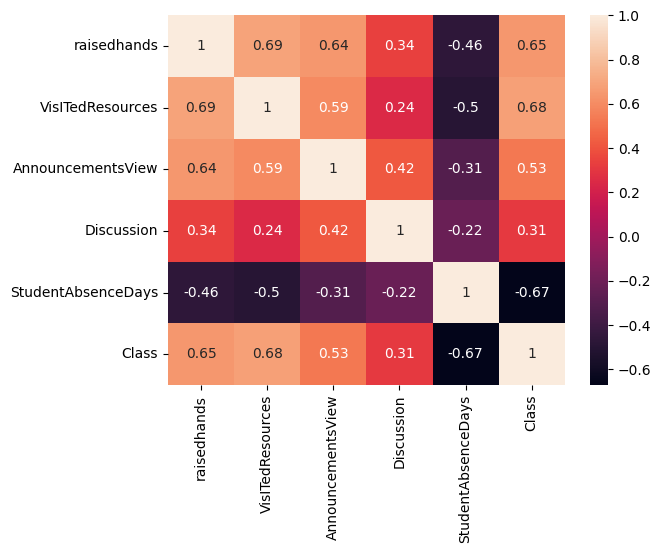

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df1.corr(),annot=True)
plt.show()

In [25]:
df2 = df[['raisedhands','VisITedResources', 'StudentAbsenceDays', 'Class']]
df2['StudentAbsenceDays'] = df2['StudentAbsenceDays'].replace({'Under-7':0, 'Above-7':1})
df2['Class'] = df2['Class'].replace({'L':0, 'M':1, 'H':2})

<ipython-input-25-27d9519e2dbb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['StudentAbsenceDays'] = df2['StudentAbsenceDays'].replace({'Under-7':0, 'Above-7':1})
<ipython-input-25-27d9519e2dbb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Class'] = df2['Class'].replace({'L':0, 'M':1, 'H':2})


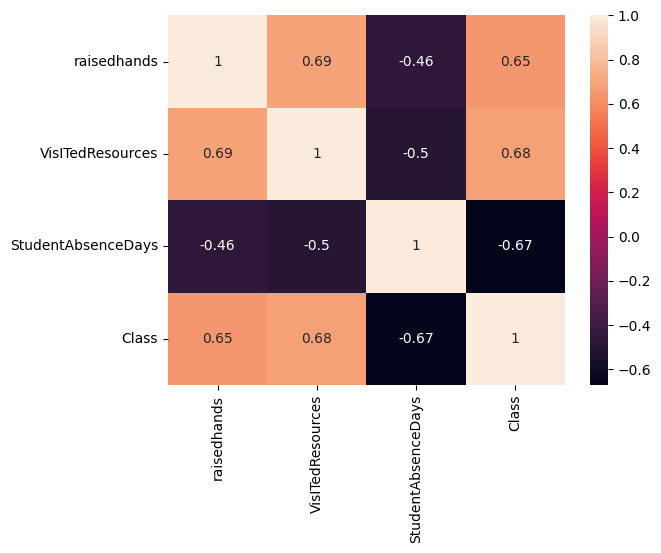

In [26]:
sns.heatmap(df2.corr(),annot=True)
plt.show()

# 3단계. 기계학습 유형과 알고리즘 선정

# 4단계. 기계학습을 통한 모델 생성

In [42]:
#학습할 속성이 될 X(독립변수)와 타겟(목표)속성이 될 y(종속변수)를 나누어 저장하기
X = df1.drop(labels=['Class'], axis=1)
y = df1['Class']

df1 에서 Class라는 이름의 속성을 찾아 세로 방향으로 삭제 기능을 수행한다. 즉, Class 속성에 해당하는 데이터들을 데이터셋에서 삭제하여 X 데이터에는 나머지 속성들의 데이터만 남게 된다. 종속 변수인 y 에는 Class 속성에 해당하는 데이터만 저장된다.

In [43]:
#Min-Max 정규화를 위해 데이터 프레임을 배열로 변환
from sklearn.preprocessing import MinMaxScaler
data_array = X.values

#Min-Max 정규화 객체 생성
scaler = MinMaxScaler()

#데이터 정규화
normalized_data = scaler.fit_transform(data_array)

#정규화된 데이터를 다시 데이터 프레임으로 변환
X = pd.DataFrame(normalized_data, columns=X.columns)

In [44]:
X.head()

,raisedhands,VisITedResources,StudentAbsenceDays
0,0.15,0.161616,0.0
1,0.20,0.202020,0.0
2,0.10,0.070707,1.0
3,0.30,0.252525,1.0
4,0.40,0.505051,1.0


In [45]:
#훈련 데이터와 테스트 데이터를 나눈다.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [46]:
#로지스틱 회귀 모델을 이용해 학습을 진행한다.
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

5. 모델을 이용해 X_test 데이터에 대한 y 기대값을 예측한다.

In [47]:
#학습 모델을 이용해 X_test의 데이터에 대한 y 기대값을 예측한 결과 logistic_predict에 저장하기
logistic_predict = logistic_model.predict(X_test)

In [48]:
#예측 결과가 담긴 logistic_predict 변수 확인하기
logistic_predict

array([1, 1, 1, 0, 1, 2, 2, 2, 1, 0, 2, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 1,
       0, 2, 1, 0, 2, 1, 1, 2, 2, 2, 0, 2, 2, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 2, 2, 1, 1, 2, 1, 0, 1, 1, 1, 2, 2, 0, 1, 2, 2, 0, 2, 1, 0, 1,
       1, 2, 1, 2, 1, 0, 1, 1, 1, 2, 0, 0, 2, 2, 0, 2, 0, 0, 1, 2, 1, 2,
       2, 1, 2, 0, 1, 1, 2, 2, 2, 0, 2, 0, 0, 1, 2, 2, 1, 1, 1, 0, 1, 0,
       1, 2, 2, 1, 0, 1, 0, 2, 1, 0, 0, 2, 1, 1, 1, 2, 0, 1, 1, 2, 1, 2,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 2, 1])

아래 내용은 날개/코드 tip / 더알아보기 등으로 변경

In [49]:
print(logistic_predict)

[1 1 1 0 1 2 2 2 1 0 2 1 1 1 1 2 0 2 1 2 0 1 0 2 1 0 2 1 1 2 2 2 0 2 2 0 1
 1 0 1 1 0 1 0 1 2 2 1 1 2 1 0 1 1 1 2 2 0 1 2 2 0 2 1 0 1 1 2 1 2 1 0 1 1
 1 2 0 0 2 2 0 2 0 0 1 2 1 2 2 1 2 0 1 1 2 2 2 0 2 0 0 1 2 2 1 1 1 0 1 0 1
 2 2 1 0 1 0 2 1 0 0 2 1 1 1 2 0 1 1 2 1 2 0 1 0 0 0 1 0 1 1 0 2 1]


# 5단계. 성능 평가

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, logistic_predict)

0.7291666666666666

In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, logistic_predict)

array([[32,  6,  1],
       [ 6, 46, 18],
       [ 0,  8, 27]])

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, logistic_predict, target_names=['L','M','H']))

              precision    recall  f1-score   support

           L       0.84      0.82      0.83        39
           M       0.77      0.66      0.71        70
           H       0.59      0.77      0.67        35

    accuracy                           0.73       144
   macro avg       0.73      0.75      0.74       144
weighted avg       0.74      0.73      0.73       144

